# Thyroid Disease Data

In [34]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv("thyroidDF.csv")

## Data feature engineering

### Initital columns

These are all the columns present in the dataset:

1. age - age of the patient (int)
2. sex - sex patient identifies (str)
3. on_thyroxine - whether patient is on thyroxine (bool)
4. query on thyroxine - *whether patient is on thyroxine (bool)
5. on antithyroid meds - whether patient is on antithyroid meds (bool)
6. sick - whether patient is sick (bool)
7. pregnant - whether patient is pregnant (bool)
8. thyroid_surgery - whether patient has undergone thyroid surgery (bool)
9. I131_treatment - whether patient is undergoing I131 treatment (bool)
10. query_hypothyroid - whether patient believes they have hypothyroid (bool)
11. query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
12. lithium - whether patient * lithium (bool)
13. goitre - whether patient has goitre (bool)
14. tumor - whether patient has tumor (bool)
15. hypopituitary - whether patient * hyperpituitary gland (float)
16. psych - whether patient * psych (bool)
17. TSH_measured - whether TSH was measured in the blood (bool)
18. TSH - TSH level in blood from lab work (float)
19. T3_measured - whether T3 was measured in the blood (bool)
20. T3 - T3 level in blood from lab work (float)
21. TT4_measured - whether TT4 was measured in the blood (bool)
22. TT4 - TT4 level in blood from lab work (float)
23. T4U_measured - whether T4U was measured in the blood (bool)
24. T4U - T4U level in blood from lab work (float)
25. FTI_measured - whether FTI was measured in the blood (bool)
26. FTI - FTI level in blood from lab work (float)
27. TBG_measured - whether TBG was measured in the blood (bool)
28. TBG - TBG level in blood from lab work (float)
29. referral_source - (str)
30. target - hyperthyroidism medical diagnosis (str)
31. patient_id - unique id of the patient (str)


### Targets from dataset

This are the initial target defined in df:
1. hyperthyroid conditions:
- A   hyperthyroid
- B   T3 toxic
- C   toxic goitre
- D   secondary toxic
  
2. hypothyroid conditions:
- E   hypothyroid
- F   primary hypothyroid
- G   compensated hypothyroid
- H   secondary hypothyroid

3. binding protein:
- I   increased binding protein
- J   decreased binding protein

4. general health:
- K   concurrent non-thyroidal illness

5. replacement therapy:
- L   consistent with replacement therapy
- M   underreplaced
- N   overreplaced

6. antithyroid treatment:
- O   antithyroid drugs
- P   I131 treatment
- Q   surgery

7. miscellaneous:
- R   discordant assay results
- S   elevated TBG
- T   elevated thyroid hormones

Since there is little data we are focusing on distinguishing patients with <b>hyperthyroid</b>, <b>hypothyroid</b> condtions or <b>none of these</b>.

There needs to be conversion to new <b>targets</b>.

In [35]:
negative_targets = ["-"]
hyperthyroid_targets = ["A", "B", "C", "D"]
hypothyroid_targets = ["E", "F", "G", "H"]

def convert_to_new_target(old_target):
    if any([x in old_target for x in negative_targets]):
        return "negative"
    if any([x in old_target for x in hyperthyroid_targets]):
        return "hyperthyroid"
    if any([x in old_target for x in hypothyroid_targets]):
        return "hypothyroid"
    return None

df["target"] = df["target"].map(convert_to_new_target)
df.dropna(subset = ['target'], inplace=True)

In [36]:
df["target"].value_counts()

target
negative        6771
hypothyroid      667
hyperthyroid     241
Name: count, dtype: int64

### Removing redundant columns
Columns that have artifial values and information about measurement that is repesented by empty value in associated column

In [37]:
rem_columns = [
    'TSH_measured',
    'T3_measured',
    'TT4_measured',
    'T4U_measured',
    'FTI_measured',
    'TBG_measured',
    'referral_source',
    'patient_id',
]
df.drop(rem_columns, axis=1 ,inplace=True)

In [38]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'target'],
      dtype='object')

### Data description

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7679.0,77.640839,1293.909497,1.000,37.00,55.00,67.00,65526.00
TSH,6955.0,5.500684,25.978304,0.005,0.55,1.40,2.70,530.00
T3,5470.0,2.010773,0.818738,0.050,1.60,1.90,2.30,18.00
TT4,7325.0,105.497565,33.125317,2.000,87.00,103.00,121.00,430.00
T4U,6998.0,0.967297,0.164388,0.190,0.87,0.96,1.06,2.12
FTI,7005.0,110.941312,37.167537,1.400,93.00,108.00,125.00,839.00
TBG,259.0,22.955019,6.088392,0.100,20.00,23.00,27.00,45.00


Without deep analysis we can see there is a problem with age column since max is 65526

In [40]:
df.sort_values("age")[-7:][["age", "target"]]

,age,target
7355,97,negative
790,97,negative
7356,97,negative
2976,455,negative
5710,65511,negative
6392,65512,negative
8105,65526,negative


In [41]:
df = df[df['age'] < 100]

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7675.0,52.013029,18.654684,1.000,37.00,55.00,67.00,97.00
TSH,6951.0,5.503416,25.985525,0.005,0.55,1.40,2.70,530.00
T3,5467.0,2.010633,0.818893,0.050,1.60,1.90,2.30,18.00
TT4,7321.0,105.490324,33.132392,2.000,87.00,103.00,121.00,430.00
T4U,6994.0,0.967268,0.164410,0.190,0.87,0.96,1.06,2.12
FTI,7001.0,110.937565,37.176408,1.400,93.00,108.00,125.00,839.00
TBG,259.0,22.955019,6.088392,0.100,20.00,23.00,27.00,45.00


In [43]:
df.describe(include='O').T

,count,unique,top,freq
sex,7421,2,F,5006
on_thyroxine,7675,2,f,6825
query_on_thyroxine,7675,2,f,7552
on_antithyroid_meds,7675,2,f,7583
sick,7675,2,f,7388
pregnant,7675,2,f,7635
thyroid_surgery,7675,2,f,7569
I131_treatment,7675,2,f,7534
query_hypothyroid,7675,2,f,7155
query_hyperthyroid,7675,2,f,7115


In [44]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %
sex,3.309446
TSH,9.433225
T3,28.768730
TT4,4.612378
T4U,8.872964
FTI,8.781759
TBG,96.625407


Drop TBG since almost whole column is missing

In [45]:
df.drop(["TBG"], axis=1 ,inplace=True)

In [46]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,NaN,NaN,NaN,NaN,negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
5,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,88.0,0.74,119.0,negative
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64.0,0.83,77.0,negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91.0,0.92,99.0,negative
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75.0,0.85,88.0,negative


In [47]:
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)
df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)

target_map = {
    "negative": 0,
    "hyperthyroid": 1,
    "hypothyroid": 2,
}

df["target"] = df["target"].map(target_map)

In [48]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %
sex,3.309446
TSH,9.433225
T3,28.768730
TT4,4.612378
T4U,8.872964
FTI,8.781759


In [75]:
from random import random, seed

seed(1337)

def get_impute_value(df, col, target):
    match col:
        case "age" | "TSH" | "T3" | "TT4" | "T4U" | "FTI" | "target":
            median_for_target = df.loc[df['target'] == target][col].median()
            return median_for_target
        case _:
            prob = df.loc[df['target'] == target][col].value_counts(normalize=True)
            return 1 if random() < prob[1] else 0

def imputed_df(df):
    df = df.copy()
    null_cols = df.columns[df.isnull().any()]
    for null_col in null_cols:
        print(f"Imputing column: {null_col}")
        df[null_col] = df.apply(
            lambda row: get_impute_value(df, null_col, row["target"]) if pd.isnull(row[null_col]) else row[null_col],
            axis=1
        )
    return df


In [76]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %


In [77]:
df = imputed_df(df)

In [78]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %


In [79]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1).copy()
y = df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [80]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [81]:
y_test_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.986451276706618

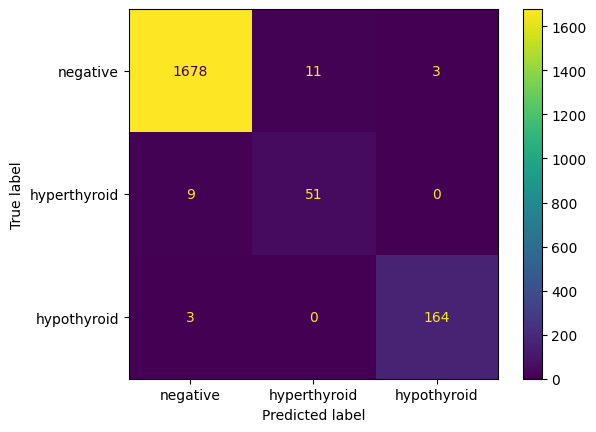

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["negative", "hyperthyroid", "hypothyroid"]

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_test_pred), display_labels=labels)
disp.plot()

In [91]:
from sklearn.metrics import f1_score

f1_score(y_test , y_test_pred,average = 'weighted')

np.float64(0.9865326975859858)

In [96]:
import pickle

with open("decisiontree.bin", "wb") as f:
    f.write(pickle.dumps(clf))

In [97]:
df[df["target"] == 1]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
28,75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050,1.6,157.0,0.89,176.0,1
100,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.065,3.6,308.0,0.87,354.0,1
151,58,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.065,7.6,250.0,0.79,316.0,1
166,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.065,3.6,188.0,0.73,258.0,1
199,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.250,4.2,236.0,0.70,337.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.020,5.9,183.0,0.82,223.0,1
8741,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.020,2.9,130.0,0.80,163.0,1
8902,84,1,0,0,0,0,0,0,0,0,...,0,0,0,0,14.000,6.7,280.0,0.85,329.0,1
9024,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.025,8.0,202.0,0.92,198.0,1
